In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557468
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624949
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898555
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.802353
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.480576
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.676666


In [6]:
df.shape

(2265, 6)

<function matplotlib.pyplot.show>

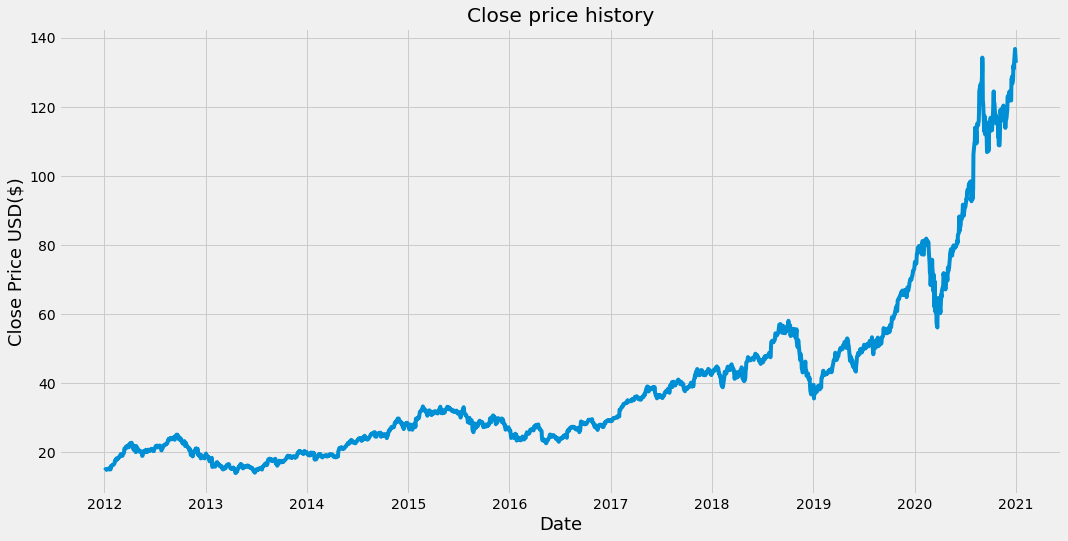

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show

In [8]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

1812

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [11]:
#Create the training data set
train_data = scaled_data[0:training_data_len, :]

#Split data into x train and y train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1752/1752 [==============================] - 48s 28ms/step - loss: 1.1743e-04
Epoch 2/10
1752/1752 [==============================] - 48s 27ms/step - loss: 8.7908e-05
Epoch 3/10
1752/1752 [==============================] - 47s 27ms/step - loss: 7.7233e-05
Epoch 4/10
1752/1752 [==============================] - 47s 27ms/step - loss: 6.2741e-05
Epoch 5/10
1752/1752 [==============================] - 46s 26ms/step - loss: 6.1213e-05
Epoch 6/10
1752/1752 [==============================] - 48s 27ms/step - loss: 5.5656e-05
Epoch 7/10
1752/1752 [==============================] - 48s 27ms/step - loss: 5.3709e-05
Epoch 8/10
1752/1752 [==============================] - 47s 27ms/step - loss: 5.0829e-05
Epoch 9/10
1752/1752 [==============================] - 47s 27ms/step - loss: 5.0771e-05
Epoch 10/10
1752/1752 [==============================] - 47s 27ms/step - loss: 4.3522e-05


In [29]:
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [30]:
x_test = np.array(x_test)

In [31]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [32]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.6624380958001346

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


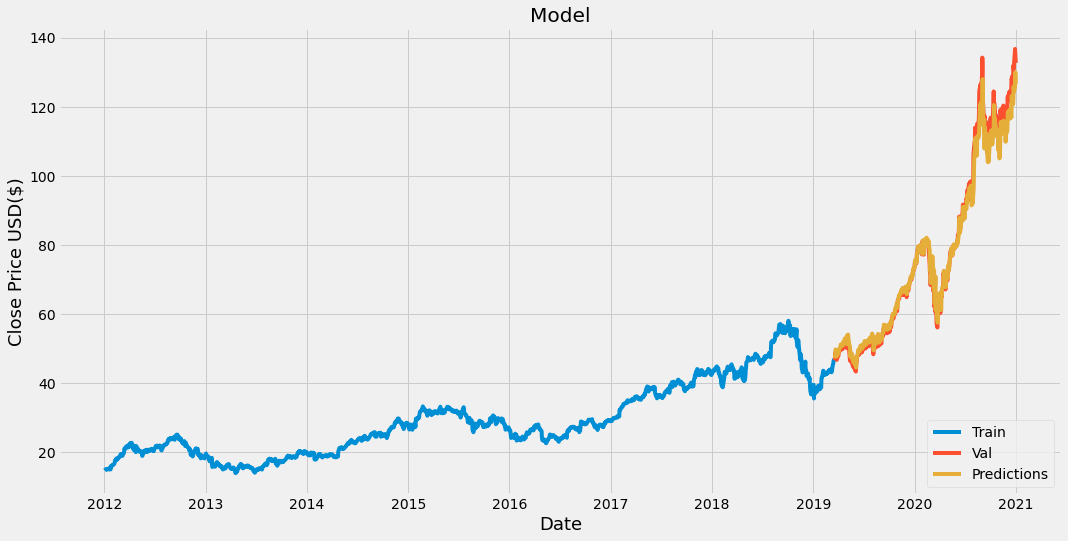

In [34]:
train = data[:training_data_len:]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()